In [47]:
import pandas as pd
data = pd.read_csv("wine.data",encoding = 'ISO-8859-1', index_col=False)
data.head()

,Class,Alcool,Malic Acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoids phenols,Proanthocyanis,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [48]:
#FIRST PART -> USING ACP TO REDUCE NUMBER OF ATTRIBUTES THEN APPLYING K-MEANS

In [49]:
#Import des autres modules utiles
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

n = data.shape[0]
print('Nombre total d\'individus :', n)

## La troisième variable contient le genre musical de chaque musique.
## Récupérer cette donnée qualitative dans un vecteur genre.
genre = data.loc[:,data.columns[2]].to_list()


## Récupérer le tableau des données quantitatives

# Considérer les données de la colonne start_col à la dernière colonne
start_col = 1 # doit être entre 3 (la colonne 2 est celle du genre musical) et data.shape[1]

p = data.shape[1] - start_col
print('La dimension des données est : ', p)

X = data.loc[:, data.columns[start_col]:data.columns[start_col+p-1]].to_numpy().reshape([n,p])
print('Taille du tableau des données :', X.shape,'\n')

mu = np.mean(X,axis=0)

sigma = np.sqrt( (1/n) * np.sum((X - mu )**2,axis=0))

x_tilde = (X-mu)/sigma

c = (1/n)*np.dot(np.transpose(x_tilde),x_tilde)

vp2,vect_p2 = np.linalg.eig(c)

for j in range(len(vp2)):
    indice = j
    for i in range(j, len(vp2)):
        if vp2[i] > vp2[indice]:
            indice = i
    temp = vp2[j]
    temp2 = vect_p2[j]
    vp2[j] = vp2[indice]
    vect_p2[j] = vect_p2[indice]
    vp2[indice] = temp
    vect_p2[indice] = temp2



Nombre total d'individus : 178
La dimension des données est :  13
Taille du tableau des données : (178, 13) 



valeurs propres
[4.70585025 2.49697373 1.44607197 0.91897392 0.85322818 0.64165703
 0.55102831 0.34849736 0.28887994 0.25090248 0.22578864 0.16877023
 0.10337794]
 
vecteurs propres
[[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634    0.13075693  0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-

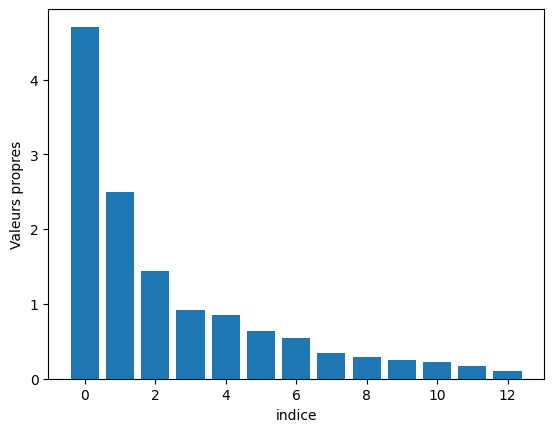

In [50]:
print('valeurs propres')
print(vp2)

print(' ')
print('vecteurs propres')
print(vect_p2)

vp2_ordonnes = np.zeros((len(vp2)))

for i in range(len(vp2)):
    vp2_ordonnes[i] = vp2[i]

vp2_ordonnes = sorted(vp2_ordonnes,reverse=True)

valeurs = [ i for i in range(len(vp2))]

plt.bar(valeurs,vp2_ordonnes)
plt.xlabel('indice')
plt.ylabel('Valeurs propres')
# Affichage
plt.show()

In [51]:
#Inertie

somme_vp2 = np.sum(vp2)

I2 = vp2/somme_vp2

somme = 0
i = 0

while somme < 0.9:
    somme += I2[i]
    i += 1

print("Il faut ", i, "attributs pour avoir", somme," %")

S = np.dot(x_tilde,vect_p2)

Il faut  8 attributs pour avoir 0.9201754434577263  %


In [52]:
from sklearn.cluster import KMeans 

model = KMeans(n_clusters=3, init='k-means++', n_init=1000)

S = S[:,:8]

model.fit(S)

#print(model.labels_)

class_differents = []
for _ in range(3):  # For each class (1, 2, 3)
    class_differents.append({i: 0 for i in range(3)})

classes = data.loc[:,data.columns[0]].to_numpy()

class_0 = 0
class_1 = 0
class_2 = 0

for i in range(178):
    if(model.labels_[i]== 0):
        class_0 += 1
    elif(model.labels_[i] == 1):
        class_1 += 1
    elif(model.labels_[i] == 2):
        class_2 += 1




for i in range(178):
    if( classes[i] == 1):
        class_differents[0][model.labels_[i]] += 1
    elif( classes[i] == 2):
        class_differents[1][model.labels_[i]] += 1
    elif( classes[i] == 3):
        class_differents[2][model.labels_[i]] += 1

print(class_differents)


print("The class 1 has 59 individuals then the class 2 has 71 and the class 3 has 48")
print("There are ",class_0," individuals in first clustering, ", class_1,"in the second clustering, ",class_2, " in the third")

[{0: 1, 1: 57, 2: 1}, {0: 60, 1: 3, 2: 8}, {0: 1, 1: 2, 2: 45}]
The class 1 has 59 individuals then the class 2 has 71 and the class 3 has 48
There are  62  individuals in first clustering,  62 in the second clustering,  54  in the third


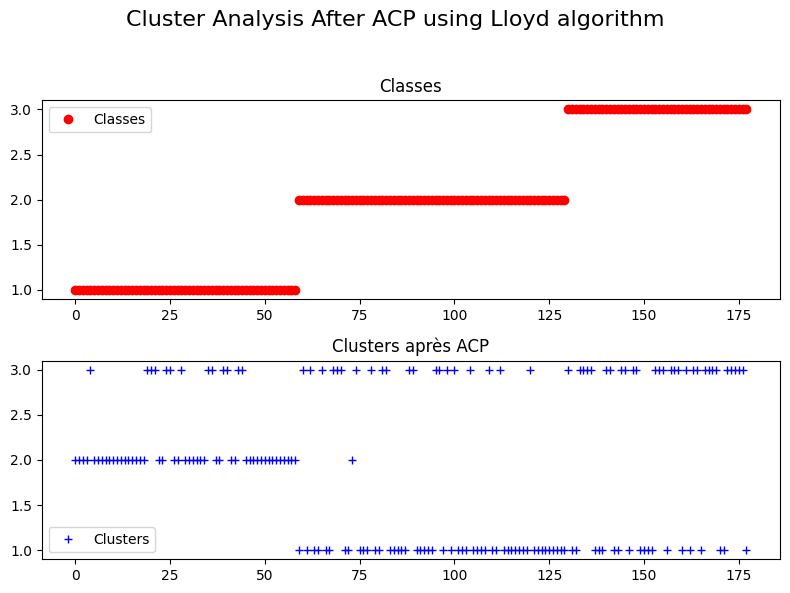

In [56]:
# Création de la figure
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Ajout des courbes
axs[0].plot(classes, 'ro', label='Classes')
axs[0].set_title("Classes")  # Titre pour le premier sous-graphe
axs[0].legend()

axs[1].plot(tab, 'b+', label='Clusters')
axs[1].set_title("Clusters après ACP")  # Titre pour le deuxième sous-graphe
axs[1].legend()

# Ajout d'un titre global
fig.suptitle("Cluster Analysis After ACP using Lloyd algorithm", fontsize=16)

# Ajustement des marges pour éviter les chevauchements
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Afficher la figure
plt.show()


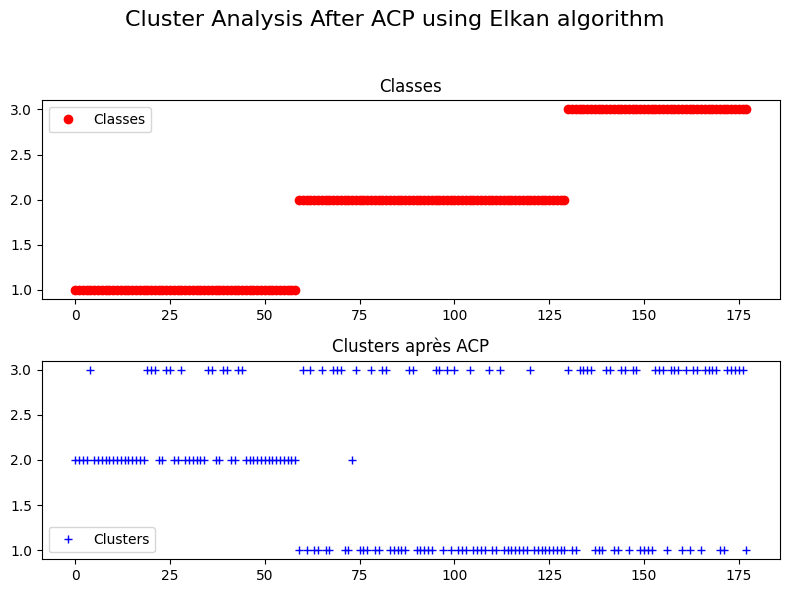

In [59]:
from sklearn.cluster import KMeans 

model2 = KMeans(n_clusters=3, init='k-means++', n_init=500, algorithm='elkan')

S = S[:,:8]

model2.fit(S)

#print(model.labels_)

classes2 = data.loc[:,data.columns[0]].to_numpy()

# Création de la figure
fig, axs = plt.subplots(2, 1, figsize=(8, 6))

# Ajout des courbes
axs[0].plot(classes2, 'ro', label='Classes')
axs[0].set_title("Classes")  # Titre pour le premier sous-graphe
axs[0].legend()

axs[1].plot(tab, 'b+', label='Clusters')
axs[1].set_title("Clusters après ACP")  # Titre pour le deuxième sous-graphe
axs[1].legend()

# Ajout d'un titre global
fig.suptitle("Cluster Analysis After ACP using Elkan algorithm", fontsize=16)

# Ajustement des marges pour éviter les chevauchements
fig.tight_layout(rect=[0, 0, 1, 0.95])

# Afficher la figure
plt.show()

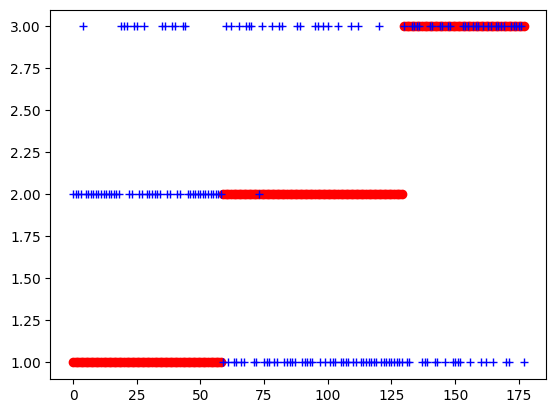

In [54]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

plt.subplots()
classes = data.loc[:,data.columns[0]].to_numpy()
plt.plot(classes, 'ro')
model = KMeans(n_clusters=3, init='k-means++', n_init=1000, algorithm='elkan').fit(data)
tab = np.array(model.labels_)
tab = tab +1
plt.plot(tab, 'b+')
plt.show()


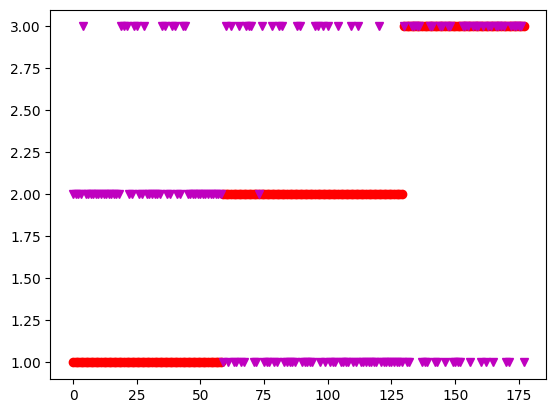

In [55]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

plt.subplots()
classes = data.loc[:,data.columns[0]].to_numpy()
plt.plot(classes, 'ro')
model = KMeans(n_clusters=3, init='k-means++', n_init=1000).fit(data)
tab = np.array(model.labels_)
tab = tab +1
plt.plot(tab, 'mv')
plt.show()